In [1]:
import torch
import torchvision.datasets as datasets
from torchmetrics.image.fid import FrechetInceptionDistance
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import FID_util
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/FID_real_image/"

## Data Sets

In [2]:
# MNIST
MNIST_train_loader = FID_util.DataLoader(datasets.MNIST('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

MNIST_test_loader =  FID_util.DataLoader(datasets.MNIST('./data', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
MNIST_train, MNIST_test = FID_util.load_data(MNIST_train_loader, MNIST_test_loader, 10000, (28, 28))

# Base FID
print(f"Base FID MNIST: {FID_util.compute_FID(MNIST_train, MNIST_test).item()}")

Base FID MNIST: 1.5220389366149902


In [3]:
# CIFAR 100
CIFAR_train_loader = FID_util.DataLoader(datasets.CIFAR100('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

CIFAR_test_loader =  FID_util.DataLoader(datasets.CIFAR100('./data', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
CIFAR_train, CIFAR_test = FID_util.load_data(CIFAR_train_loader, CIFAR_test_loader, 10000, (32, 32))

# Base FID
print(f"Base FID CIFAR: {FID_util.compute_FID(CIFAR_train, CIFAR_test).item()}")

Files already downloaded and verified
Files already downloaded and verified
Base FID CIFAR: 5.892246723175049


In [4]:
# CelebA
CelebA_train_loader = DataLoader(datasets.CelebA('./data', split="train", download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

CelebA_test_loader =  DataLoader(datasets.CelebA('./data', split="test", download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
CelebA_train, CelebA_test = FID_util.load_data(CelebA_train_loader, CelebA_test_loader, 10000, (218, 178))

# Base FID
print(f"Base FID CelebA: {FID_util.compute_FID(CelebA_train, CelebA_test, batch_num=125).item()}")

Files already downloaded and verified
Files already downloaded and verified
Base FID CelebA: 3.541612386703491


## Gamma Correction

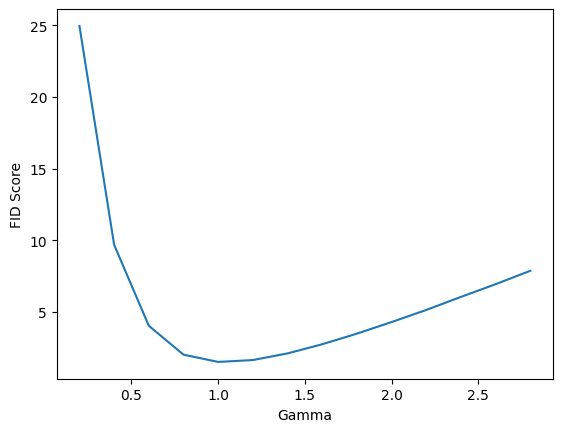

In [5]:
gamma_array = np.arange(0.2, 3.0, 0.2)
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", MNIST_train, MNIST_test)
plt.savefig(plot_path + "MNIST_gamma_fid_scores")

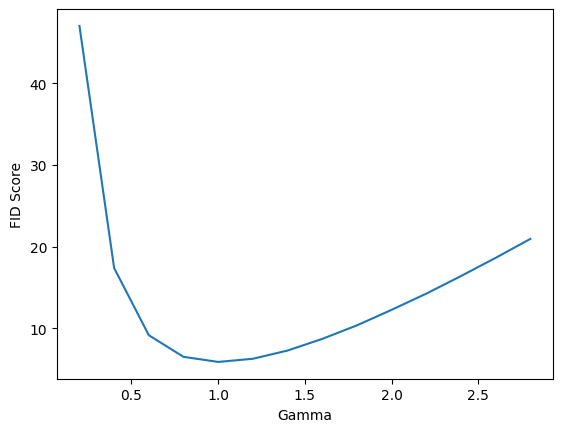

In [6]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CIFAR_train, CIFAR_test)
plt.savefig(plot_path+ "CIFAR_gamma_fid_scores")

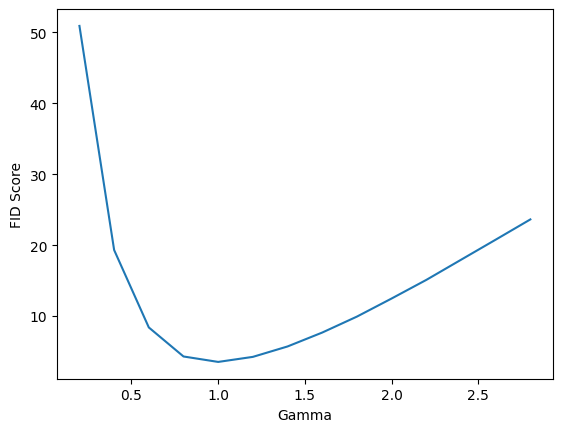

In [7]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CelebA_train, CelebA_test, batch_num=125)
plt.savefig(plot_path+ "CelebA_gamma_fid_scores")

## Image Saturation

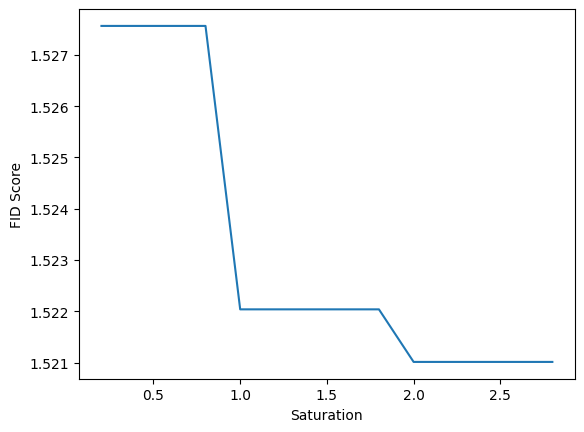

In [8]:
level_array = np.arange(0.2, 3.0, 0.2)
FID_util.plot_FID(level_array, transforms.functional.adjust_saturation, "Saturation", MNIST_train, MNIST_test)
plt.savefig(plot_path + "MNIST_saturation_fid_scores")

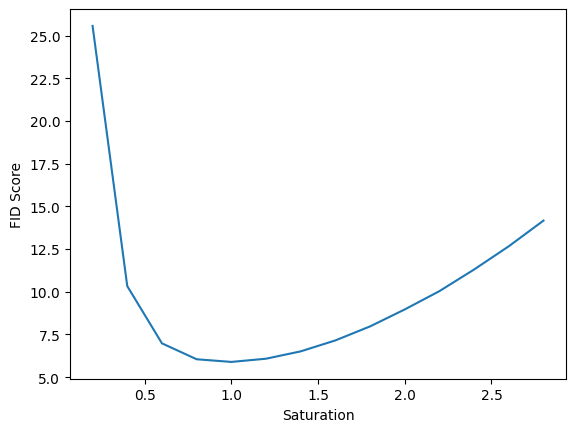

In [9]:
FID_util.plot_FID(level_array, transforms.functional.adjust_saturation, "Saturation", CIFAR_train, CIFAR_test)
plt.savefig(plot_path + "CIFAR_saturation_fid_scores")

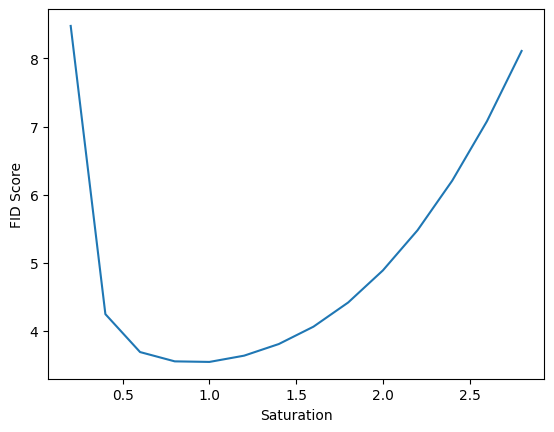

In [10]:
FID_util.plot_FID(level_array, transforms.functional.adjust_saturation, "Saturation", CelebA_train, CelebA_test, batch_num=125)
plt.savefig(plot_path + "CelebA_saturation_fid_scores")

## Invert Image

In [11]:
print(f"FID of Inverted MNIST: {FID_util.invert_FID(MNIST_train, MNIST_test)}")

FID of Inverted MNIST: 224.66769409179688


In [12]:
print(f"FID of Inverted CIFAR: {FID_util.invert_FID(CIFAR_train, CIFAR_test)}")

FID of Inverted CIFAR: 62.261802673339844


In [13]:
print(f"FID of Inverted CelebA: {FID_util.invert_FID(CelebA_train, CelebA_test, batch_num=125)}")

FID of Inverted CelebA: 118.49760437011719


## Sectional Rotations

MNIST: 41.28431701660156


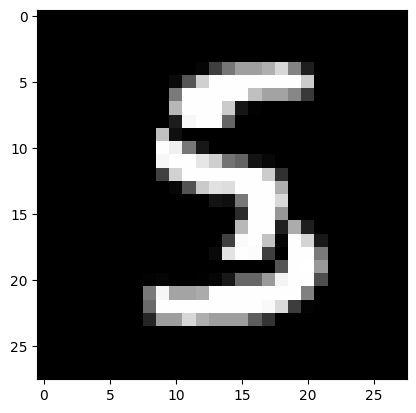

In [14]:
print(f"MNIST: {FID_util.rotate_chunk((9, 9, 19, 19), MNIST_train, MNIST_test)}")

CIFAR: 16.03802490234375


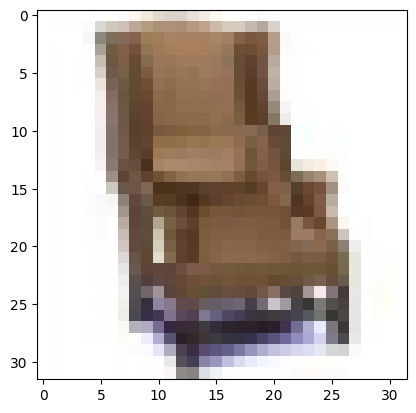

In [15]:
print(f"CIFAR: {FID_util.rotate_chunk((10, 10, 22, 22), CIFAR_train, CIFAR_test)}")

CelebA: 25.144485473632812


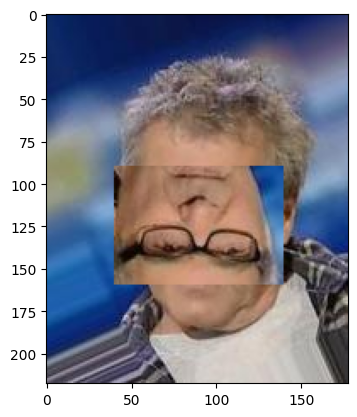

In [16]:
print(f"CelebA: {FID_util.rotate_chunk((40, 90, 140, 160), CelebA_train, CelebA_test, batch_num=125)}")